# K-Means and VQ
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement the **K-Means clustering** algorithm
- play with the hyperparameter K 
- implement the Vector Quantization with K-Means

Please note that **YOU CANNOT USE ANY MACHINE LEARNING PACKAGE SUCH AS SKLEARN** for any homework, unless you are asked.

In [1]:
# some basic imports
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

%load_ext autoreload
%autoreload 2

Run your k-means algorithm on `kmeans_data.mat`. Note that the lines indicate the iterations of centroids.

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950


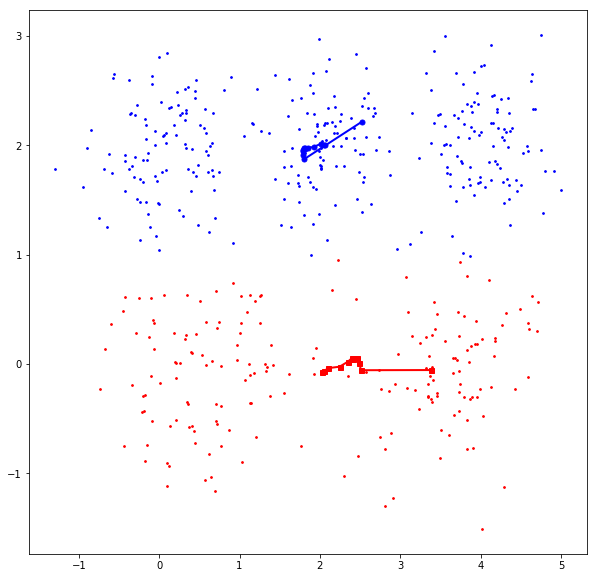

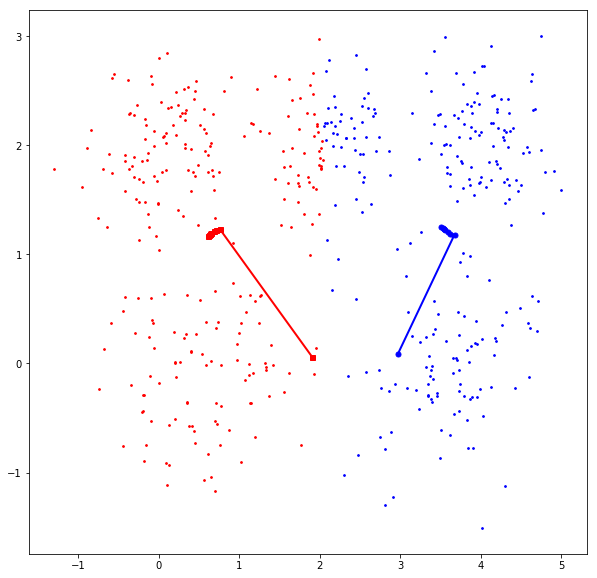

In [2]:
from kmeans import kmeans
from kmeans_plot import kmeans_plot
x = sio.loadmat('kmeans_data.mat')['X']
k = 2  # modify if you want
minSD = float('inf')
maxSD = 0
N, _ = x.shape
for i in range(1000):
    idx, ctrs, iter_ctrs = kmeans(x, k)
    # calculate SD
    SD = 0
    for n in range(N):
        SD += np.linalg.norm(x[n, :] - ctrs[idx[n], :])
    if SD > maxSD:
        maxSD = SD
        max_idx = idx
        max_ctrs = ctrs
        max_iter_ctrs = iter_ctrs
    if SD < minSD:
        minSD = SD
        min_idx = idx
        min_ctrs = ctrs
        min_iter_ctrs = iter_ctrs
    if(i % 50 == 0):
        print(i)
kmeans_plot(x, max_idx, max_ctrs, max_iter_ctrs)
kmeans_plot(x, min_idx, min_ctrs, min_iter_ctrs)

Run your k-means algorithm on the digit dataset `digit_data.mat`. 

10
20
50


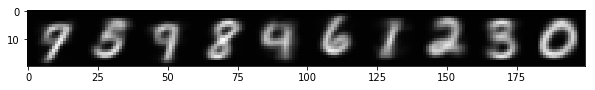

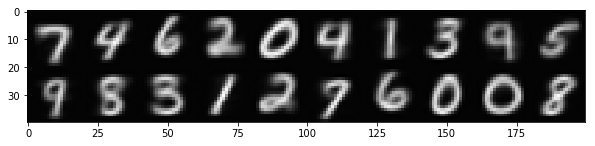

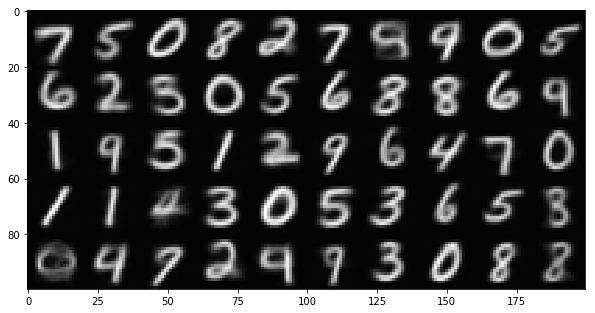

In [3]:
from show_digit import show_digit
x = sio.loadmat('digit_data.mat')['X']
for k in [10, 20, 50]:
    print(k)
    _, ctrs, _ = kmeans(x, k)
    show_digit(ctrs)

# Vector quantization
Compress images with K set to 8, 16, 32 and 64.

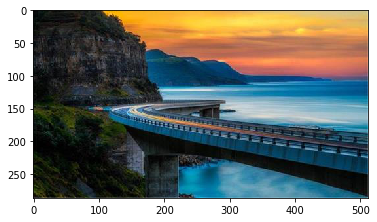

In [31]:
from kmeans import kmeans
from matplotlib.pyplot import imread
import numpy as np
img = imread('sample.jpg')
fea = img.reshape((img.shape[0]*img.shape[1], 3)).astype(np.float64) # fea.shape = (Pixels, Channel)
plt.imshow(fea.reshape(img.shape).astype(np.uint8))
plt.show()

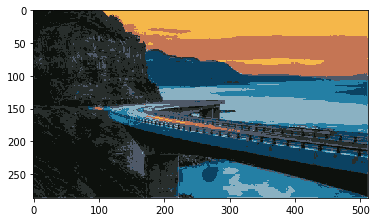

In [35]:
from kmeans import kmeans
from matplotlib.pyplot import imread
import numpy as np
img = imread('sample.jpg')
fea = img.reshape((img.shape[0]*img.shape[1], 3)).astype(np.float64) # fea.shape = (Pixels, Channel)
idx, ctrs, _ = kmeans(fea, 8)
for n in range(fea.shape[0]):
    fea[n, :] = ctrs[idx[n], :]
plt.imshow(fea.reshape(img.shape).astype(np.uint8))
plt.show()

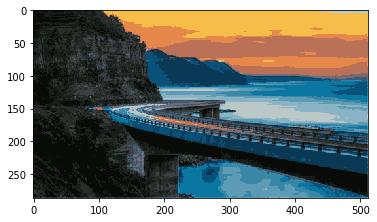

In [34]:
from kmeans import kmeans
from matplotlib.pyplot import imread
import numpy as np
img = imread('sample.jpg')
fea = img.reshape((img.shape[0]*img.shape[1], 3)).astype(np.float64) # fea.shape = (Pixels, Channel)
idx, ctrs, _ = kmeans(fea, 16)
for n in range(fea.shape[0]):
    fea[n, :] = ctrs[idx[n], :]
plt.imshow(fea.reshape(img.shape).astype(np.uint8))
plt.show()

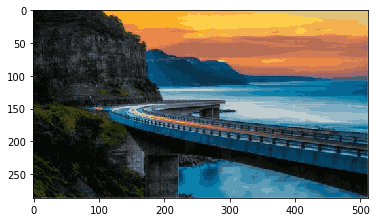

In [33]:
from kmeans import kmeans
from matplotlib.pyplot import imread
import numpy as np
img = imread('sample.jpg')
fea = img.reshape((img.shape[0]*img.shape[1], 3)).astype(np.float64) # fea.shape = (Pixels, Channel)
idx, ctrs, _ = kmeans(fea, 32)
for n in range(fea.shape[0]):
    fea[n, :] = ctrs[idx[n], :]
plt.imshow(fea.reshape(img.shape).astype(np.uint8))
plt.show()

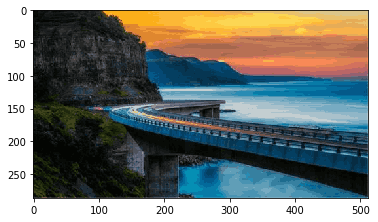

In [2]:
from kmeans import kmeans
from matplotlib.pyplot import imread
import numpy as np
img = imread('sample.jpg')
fea = img.reshape((img.shape[0]*img.shape[1], 3)).astype(np.float64) # fea.shape = (Pixels, Channel)
idx, ctrs, _ = kmeans(fea, 64)
for n in range(fea.shape[0]):
    fea[n, :] = ctrs[idx[n], :]
plt.imshow(fea.reshape(img.shape).astype(np.uint8))
plt.show()

In [5]:
cnt = np.zeros(64)
for i in range(64):
    cnt[i] = np.sum(idx == i)
np.savez('cnt.npz', cnt=cnt)